In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [71]:
plt.rcParams['figure.figsize'] = (11.5, 8.5)

### Point wise

In [72]:
events_data = pd.read_csv('movie_events_linear.csv')
events_data.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Thriller,War,Western,price,ratings_average,ratings_count,release_date,unknown,outcome,user_id
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.283637,0.169532,-0.142869,0.393978,0.0,0,534
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.283637,-0.097012,-0.715191,0.393978,0.0,1,686
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,-0.777083,-1.056570,-0.690307,0.253620,0.0,1,532
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.246723,-0.416864,-0.690307,0.393978,0.0,1,624
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.344357,1.138281,-0.379263,0.464156,0.0,0,577


In [73]:
events_data.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'price',
       'ratings_average', 'ratings_count', 'release_date', 'unknown',
       'outcome', 'user_id'],
      dtype='object')

## Задание 0

Посчитайте число уникальных пользователей и среднее число фильмов на каждого в датасете

In [74]:
print(len(np.unique(events_data['user_id'])))

999


In [75]:
print(events_data.shape[0] / np.unique(events_data['user_id']).shape[0])

20.0


## Задание 1

Разбейте выборку на train и test. Важно, чтобы все пользователи попали в трейн и тест.

In [76]:
# YOUR CODE HERE

In [77]:
X = events_data.drop('outcome', axis = 1)
y = events_data['outcome']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, stratify=X['user_id'])

## Задание 2

Закодируйте признак `user_id` с помощью OHE.

Используйте `ColumnTransformer`.

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


column_transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['user_id'])
], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [80]:
X_train

<13986x1022 sparse matrix of type '<class 'numpy.float64'>'
	with 94148 stored elements in Compressed Sparse Row format>

In [81]:
X_train.toarray()

array([[ 0.        ,  0.        ,  0.        , ..., -0.7151908 ,
         0.25362019,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.26770898,
         0.32379888,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.51612249,
         0.53433495,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  3.19152478,
         0.53433495,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  3.61454494,
         0.53433495,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.06821879,
         0.32379888,  0.        ]])

In [82]:
column_transformer.get_feature_names()

['onehot__x0_1',
 'onehot__x0_2',
 'onehot__x0_3',
 'onehot__x0_4',
 'onehot__x0_5',
 'onehot__x0_6',
 'onehot__x0_7',
 'onehot__x0_8',
 'onehot__x0_9',
 'onehot__x0_10',
 'onehot__x0_11',
 'onehot__x0_12',
 'onehot__x0_13',
 'onehot__x0_14',
 'onehot__x0_15',
 'onehot__x0_16',
 'onehot__x0_17',
 'onehot__x0_18',
 'onehot__x0_19',
 'onehot__x0_20',
 'onehot__x0_21',
 'onehot__x0_22',
 'onehot__x0_23',
 'onehot__x0_24',
 'onehot__x0_25',
 'onehot__x0_26',
 'onehot__x0_27',
 'onehot__x0_28',
 'onehot__x0_29',
 'onehot__x0_30',
 'onehot__x0_31',
 'onehot__x0_32',
 'onehot__x0_33',
 'onehot__x0_34',
 'onehot__x0_35',
 'onehot__x0_36',
 'onehot__x0_37',
 'onehot__x0_38',
 'onehot__x0_39',
 'onehot__x0_40',
 'onehot__x0_41',
 'onehot__x0_42',
 'onehot__x0_43',
 'onehot__x0_44',
 'onehot__x0_45',
 'onehot__x0_46',
 'onehot__x0_47',
 'onehot__x0_48',
 'onehot__x0_49',
 'onehot__x0_50',
 'onehot__x0_51',
 'onehot__x0_52',
 'onehot__x0_53',
 'onehot__x0_54',
 'onehot__x0_55',
 'onehot__x0_56',
 

## Задание 3

Обучите логистическую регрессию.

In [83]:
y_test

8460     1
1464     1
6389     0
452      0
6704     1
        ..
15299    1
14459    0
19408    1
16764    0
13061    1
Name: outcome, Length: 5994, dtype: int64

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Задание 4

Сделайте предсказание для теста, измерьте качество с помощью Precision. 

In [85]:
from sklearn.metrics import precision_score

y_pred = lr.predict(X_test)

In [86]:
precision_score(y_test, y_pred)

0.6889208633093525

## Задание 5

Просчитайте precision для каждого пользователя отдельно и усредните

In [87]:
np.where(user_cols[:, 2] == 1)[0]

array([   96,  1509,  1880,  3066,  3186,  3564,  3925,  4026,  7787,
        9674, 11470, 12019, 13686, 14105, 15564, 15789, 17210, 17864,
       19248, 19346, 21034, 21741, 22365, 24857, 25237, 28111, 28797,
       28851, 30386, 30479, 32534, 32839, 33012, 33379, 35949, 36578,
       37472, 37849], dtype=int64)

In [88]:
N_users = np.unique(events_data['user_id']).shape[0]
user_cols = X_test.toarray()[:, :N_users]
pr = []
for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    pr.append(precision_score(y_test.values[ids], y_pred[ids], zero_division=0))

print(np.mean(pr))

0.6855689022355689


## Задание 6

Для каждого пользователя выберете 3 самых 'уверенных' прогноза модели и посчитайте pr@3.

Вам пригодятся функции `np.where` и `np.argsort`

In [89]:
pr3 = []

y_pred_prob = lr.predict_proba(X_test)[:,1]

for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    ps = y_pred_prob[ids]
    mose_ids = ids[np.argsort(ps)[-3:]]
    
    pr3.append(precision_score(y_test.values[mose_ids], y_pred[mose_ids], zero_division=0))
    
print(np.mean(pr3))

0.7245578912245578


---

# Pair wise

Используем данные о парах фильмах. Значение 1 целевой переменной означает, что был выбран фильм 1, а 0 - что фильм 2.

In [90]:
events_data = pd.read_csv('movie_events_pairwise-linear.csv')

In [91]:
events_data.head()

,Action_1,Adventure_1,Animation_1,Children's_1,Comedy_1,Crime_1,Documentary_1,Drama_1,Fantasy_1,Film-Noir_1,...,Thriller_2,War_2,Western_2,price_2,ratings_average_2,ratings_count_2,release_date_2,unknown_2,outcome,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.283637,-0.325478,-0.391705,0.604514,0.0,0.0,517.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.813997,0.268534,-0.478797,0.464156,0.0,1.0,155.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.777083,-0.378482,-0.117986,-1.430668,0.0,0.0,559.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.283637,0.060890,3.191525,0.534335,0.0,0.0,707.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-2.368163,-2.655833,-0.727633,0.464156,0.0,0.0,73.0


In [92]:
events_data.columns

Index(['Action_1', 'Adventure_1', 'Animation_1', 'Children's_1', 'Comedy_1',
       'Crime_1', 'Documentary_1', 'Drama_1', 'Fantasy_1', 'Film-Noir_1',
       'Horror_1', 'Musical_1', 'Mystery_1', 'Romance_1', 'Sci-Fi_1',
       'Thriller_1', 'War_1', 'Western_1', 'price_1', 'ratings_average_1',
       'ratings_count_1', 'release_date_1', 'unknown_1', 'Action_2',
       'Adventure_2', 'Animation_2', 'Children's_2', 'Comedy_2', 'Crime_2',
       'Documentary_2', 'Drama_2', 'Fantasy_2', 'Film-Noir_2', 'Horror_2',
       'Musical_2', 'Mystery_2', 'Romance_2', 'Sci-Fi_2', 'Thriller_2',
       'War_2', 'Western_2', 'price_2', 'ratings_average_2', 'ratings_count_2',
       'release_date_2', 'unknown_2', 'outcome', 'user_id'],
      dtype='object')

In [93]:
events_data.shape

(130236, 48)

In [94]:
events_data['outcome'].value_counts()

0.0    65118
1.0    65118
Name: outcome, dtype: int64

In [95]:
print(np.unique(events_data['user_id']).shape)

print(events_data.shape[0]/np.unique(events_data['user_id']).shape[0])

(999,)
130.36636636636638


## Задание 7

Разбейте выборку на train и test, закодируйте переменную user_id.

In [96]:
X = events_data.drop('outcome', axis = 1)
y = events_data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, stratify=X['user_id'])

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91165, 47), (39071, 47), (91165,), (39071,))

In [98]:
column_transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['user_id'])
], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

## Задание 8

Обучите логистическую регрессию.

In [99]:
model0 = LogisticRegression(random_state=13, max_iter=2000)
model0.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=13)

## Задание 9

Сделайте предсказание для теста, измерьте качество с помощью метрик из предыдущей части. Сравните результат.

In [100]:
y_pred = model0.predict(X_test)
precision_score(y_test, y_pred)

0.7069807672738374

In [101]:
N_users = np.unique(events_data['user_id']).shape[0]
user_cols = X_test.toarray()[:, :N_users]
pr = []
for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    pr.append(precision_score(y_test.values[ids], y_pred[ids], zero_division=0))

print(np.mean(pr))

0.7158322637144645


In [102]:
pr3 = []

y_pred_prob = model0.predict_proba(X_test)[:,1]

for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    ps = y_pred_prob[ids]
    mose_ids = ids[np.argsort(ps)[-3:]]
    
    pr3.append(precision_score(y_test.values[mose_ids], y_pred[mose_ids], zero_division=0))
    
print(np.mean(pr3))

0.8742075408742076


In [103]:
model0.coef_

array([[ 0.16925529, -0.02171814, -0.06588586, ..., -0.06600176,
         0.32074027, -0.86091875]])

## Задание 10

Выведите важности признаков (`model0.coef_`)

In [104]:
feature_importances = pd.DataFrame({'feature': column_transformer.get_feature_names(),
                                    'importance': np.abs(model0.coef_.reshape(-1))})
feature_importances

,feature,importance
0,onehot__x0_1.0,0.169255
1,onehot__x0_2.0,0.021718
2,onehot__x0_3.0,0.065886
3,onehot__x0_4.0,0.037634
4,onehot__x0_5.0,0.040517
...,...,...
1040,price_2,0.521328
1041,ratings_average_2,0.457034
1042,ratings_count_2,0.066002
1043,release_date_2,0.320740


In [105]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.iloc[:10]

,feature,importance
1044,unknown_2,0.860919
1021,unknown_1,0.807220
556,onehot__x0_557.0,0.602909
1017,price_1,0.527277
951,onehot__x0_952.0,0.524241
1040,price_2,0.521328
628,onehot__x0_629.0,0.502677
380,onehot__x0_381.0,0.492501
858,onehot__x0_859.0,0.459541
1041,ratings_average_2,0.457034


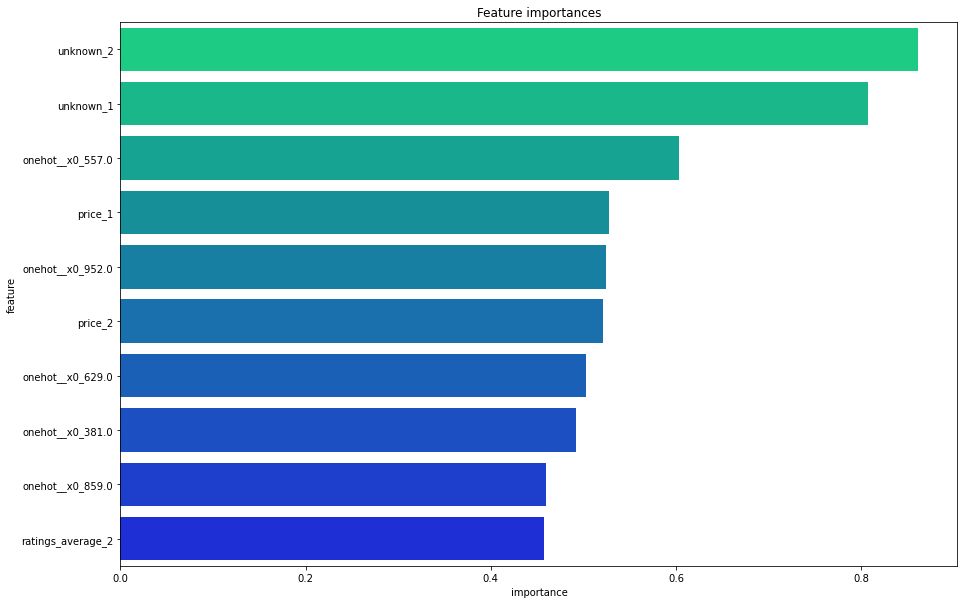

In [106]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances[:10], x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

## Задание 11

Проделайте то же самое, но со случайным лесом.

In [107]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
y_pred = rf.predict(X_test)

precision_score(y_test, y_pred)

0.9444986895523922

In [109]:
N_users = np.unique(events_data['user_id']).shape[0]
user_cols = X_test.toarray()[:, :N_users]
pr = []
for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    pr.append(precision_score(y_test.values[ids], y_pred[ids], zero_division=0))

print(np.mean(pr))

0.9413106817763708


In [110]:
pr3 = []

y_pred_prob = rf.predict_proba(X_test)[:,1]

for i in range(N_users):
    ids = np.where(user_cols[:, i] == 1)[0]
    ps = y_pred_prob[ids]
    mose_ids = ids[np.argsort(ps)[-3:]]
    
    pr3.append(precision_score(y_test.values[mose_ids], y_pred[mose_ids], zero_division=0))
    
print(np.mean(pr3))

0.997163830497164


In [111]:

feature_importances = pd.DataFrame({'feature': column_transformer.get_feature_names(),
                                    'importance': rf.feature_importances_})
feature_importances

,feature,importance
0,onehot__x0_1.0,0.000660
1,onehot__x0_2.0,0.000293
2,onehot__x0_3.0,0.000489
3,onehot__x0_4.0,0.000470
4,onehot__x0_5.0,0.000159
...,...,...
1040,price_2,0.068528
1041,ratings_average_2,0.087570
1042,ratings_count_2,0.050496
1043,release_date_2,0.046516


In [112]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.iloc[:10]

,feature,importance
1041,ratings_average_2,0.087570
1018,ratings_average_1,0.081820
1017,price_1,0.074044
1040,price_2,0.068528
1019,ratings_count_1,0.050645
1042,ratings_count_2,0.050496
1020,release_date_1,0.047031
1043,release_date_2,0.046516
1029,Drama_2,0.008458
1006,Drama_1,0.008175


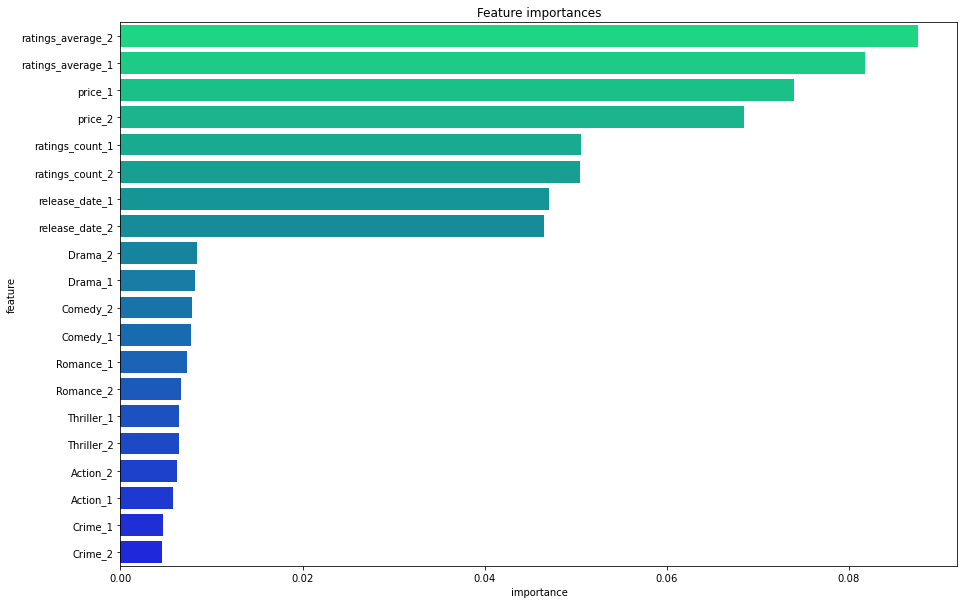

In [113]:
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances[:20], x='importance', y='feature', palette="winter_r")
plt.title('Feature importances')
plt.show()

## Задание 12

Проделайте то же самое, но с градиентным бустингом.

In [114]:
# your code here